<img src='figures/logo.png'>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lineares-vs-Não-lineares" data-toc-modified-id="Lineares-vs-Não-lineares-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lineares vs Não lineares</a></span></li><li><span><a href="#Classificação" data-toc-modified-id="Classificação-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classificação</a></span><ul class="toc-item"><li><span><a href="#Regressão-Logistica" data-toc-modified-id="Regressão-Logistica-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Regressão Logistica</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#K-NN" data-toc-modified-id="K-NN-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>K-NN</a></span></li><li><span><a href="#Arvore-de-Decisão" data-toc-modified-id="Arvore-de-Decisão-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Arvore de Decisão</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Regressão" data-toc-modified-id="Regressão-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regressão</a></span><ul class="toc-item"><li><span><a href="#Regressão-Linear" data-toc-modified-id="Regressão-Linear-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Regressão Linear</a></span></li><li><span><a href="#Arvores-de-decisão" data-toc-modified-id="Arvores-de-decisão-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Arvores de decisão</a></span></li></ul></li><li><span><a href="#Clusters" data-toc-modified-id="Clusters-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Clusters</a></span><ul class="toc-item"><li><span><a href="#Kmeans" data-toc-modified-id="Kmeans-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Kmeans</a></span></li><li><span><a href="#Hierarquico" data-toc-modified-id="Hierarquico-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Hierarquico</a></span></li></ul></li></ul></div>

# Lineares vs Não lineares

<img src='figures/linear_nonlinear.jpeg'>

# Classificação

* Metodo supervisionado para atribuir um rotulo a uma amostra com base nos atributos. Esse tipo de aprendizado precisa dos rótulos ou numeros para que o algoritmo aprenda

<img src='figures/uml_sklearn.png'>

* Faz a adequação do modelo (aprende)

    - fit(X,y)

* Faz a predição de classes
    - predict(X)

* Faz a predição do logaritmo das probabilidades
    - predict_log_proba(X)

* Faz a predição de probabilidade
    - predict_proba(X)

* Obtém a precisão (Acurácia)
score(X, y)




## Regressão Logistica

* Estima probabilidades usando uma função logistica (Atenção: é uma algoritmo de classificação)


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [50]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)

In [51]:
data = load_iris()
df_X = pd.DataFrame(data.data, columns=data.feature_names)
df_y = pd.Series(data.target)

In [52]:
clf = LogisticRegression(random_state=0, max_iter=200).fit(X, y)

In [53]:
clf.predict(X[:2, :])

array([0, 0])

In [54]:
clf.predict_proba(X[:2, :])

array([[9.81585340e-01, 1.84146460e-02, 1.44722979e-08],
       [9.71343055e-01, 2.86569152e-02, 3.01390595e-08]])

In [55]:
clf.score(X, y)

0.9733333333333334

In [56]:
clf.coef_

array([[-0.42354832,  0.96729441, -2.51726597, -1.07960148],
       [ 0.53445037, -0.32138049, -0.2065987 , -0.94400042],
       [-0.11090205, -0.64591392,  2.72386467,  2.0236019 ]])

In [69]:
from sklearn import linear_model
from scipy.special import expit

# # General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
len(X)

150

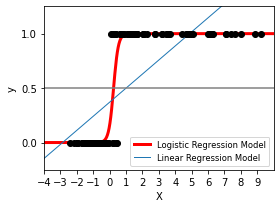

In [70]:

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

## Naive Bayes

## K-NN

## Arvore de Decisão

## Random Forest

# Regressão 

## Regressão Linear

## Arvores de decisão

# Clusters

## Kmeans

## Hierarquico